In [1]:
# Getting Scripts
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', '..', 'scripts')))


## Experimenting with Different Approaches For Modular Exponentiation

Modular arithmetic is a fundamental concept in number theory and cryptography. One key operation in modular arithmetic is modular exponentiation, which calculates:  

$$
base^{exp} \mod n
$$

This operation is widely used in encryption algorithms such as RSA. In this notebook, we will implement and analyze different methods for computing modular exponentiation efficiently.  

---

### **2. Modular Exponentiation**  
There are three main approaches to computing modular exponentiation:  

1. **Direct Computation** – Compute $ base^{exp} $ first, then take modulo $ n $.  
2. **Efficient Method (Exponentiation by Squaring)** – Reduces computation steps significantly.  
3. **Python’s Built-in `pow()` Function** – Uses optimized algorithms internally.  

We will implement all three methods and compare their efficiency.  


## Implementing the Direct approach

```python
    (base ** exponent)%modulus
```

In [2]:
direct_approach = lambda base, exponent, modulus: (base ** exponent) % modulus


## Implementing the Exponentiation by Squaring approach

In [3]:
# Code for Modular Exponentiation
def exponentiation_by_squaring_approach(base, exponent, modulus):
    result = 1
    base = base % modulus  # Handle base greater than modulus

    while exponent > 0:
        # If exponent is odd, multiply the current base with result
        if exponent % 2 == 1:
            result = (result * base) % modulus

        # Now exponent must be even, square the base and halve the exponent
        exponent = exponent // 2
        base = (base * base) % modulus

    return result




## Implementing the with Python's Built-In `pow()`

```python
    pow(base, exponent, modulus)
```


In [4]:
python_builtin_approach = lambda base, exponent, modulus: pow(base, exponent, modulus)

### **3. Testing with Examples**  
To verify our implementations, we will use the following test cases:  

- **Test 1:** $ 3^{644} \mod 645 $
- **Test 2:** $ 7^{121} \mod 13 $

We expect all methods to return the same result.  


In [5]:
from utils import run_modular_exponentiation_approaches_and_save_results


test_cases=[
    {'base': 3, 'exponent':644, 'modulus':645},
    {'base': 7, 'exponent':121, 'modulus':13},
]

approaches = [
    {'name': "Direct Approach",                         'func': direct_approach}, 
    {'name': "Exponentiation By Squaring Approach",     'func':exponentiation_by_squaring_approach}, 
    {'name': "Python Builtin Function Approach",        'func': python_builtin_approach}
]

for approach in approaches:
    for case in test_cases:
        print("\n\n")
        run_modular_exponentiation_approaches_and_save_results(approach['func'], approach['name'], case['base'], case['exponent'], case['modulus'], log_file=os.path.join(os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data')), 'modular_exponentiation_log.csv'))






Direct Approach
Base: 3, Exponent: 644, Modulus: 645
Result: 36, Execution Time: 0.000011 seconds



Direct Approach
Base: 7, Exponent: 121, Modulus: 13
Result: 7, Execution Time: 0.000006 seconds



Exponentiation By Squaring Approach
Base: 3, Exponent: 644, Modulus: 645
Result: 36, Execution Time: 0.000010 seconds



Exponentiation By Squaring Approach
Base: 7, Exponent: 121, Modulus: 13
Result: 7, Execution Time: 0.000004 seconds



Python Builtin Function Approach
Base: 3, Exponent: 644, Modulus: 645
Result: 36, Execution Time: 0.000004 seconds



Python Builtin Function Approach
Base: 7, Exponent: 121, Modulus: 13
Result: 7, Execution Time: 0.000003 seconds


### **4. Performance Benchmarking**  
Efficiency is critical, especially when dealing with large numbers. We will measure the execution time for each method and log the results.  

Metrics to collect:  
- Execution time for each method.  
- Difference in performance between methods.  



In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data')), 'modular_exponentiation_log.csv'))

df

,Approach,Base,Exponent,Modulus,Result,Execution Time (seconds)
0,Direct Approach,3,644,645,36,0.000011
1,Direct Approach,7,121,13,7,0.000006
2,Exponentiation By Squaring Approach,3,644,645,36,0.000010
3,Exponentiation By Squaring Approach,7,121,13,7,0.000004
4,Python Builtin Function Approach,3,644,645,36,0.000004
5,Python Builtin Function Approach,7,121,13,7,0.000003


### **5. Results & Visualization**  
To better understand the performance differences, we will:  
- Display execution times in a tabular format.  
- Plot a bar chart comparing the methods.  




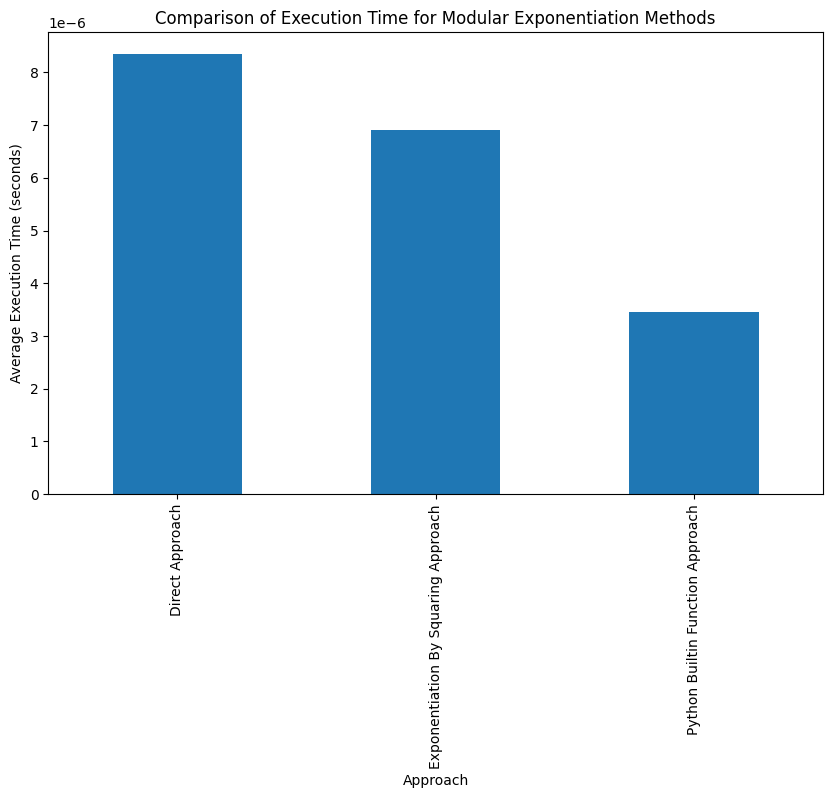

In [7]:
# Group by the method and plot the times
plt.figure(figsize=(10, 6))
df.groupby('Approach')['Execution Time (seconds)'].mean().plot(kind='bar')
plt.title('Comparison of Execution Time for Modular Exponentiation Methods')
plt.ylabel('Average Execution Time (seconds)')
plt.show()


### **6. Conclusion**  
From our analysis, we can determine which method is the most efficient. Generally:  
- **Direct computation** is slow and impractical for large numbers.  
- **Exponentiation by squaring** is significantly faster.  
- **Python’s `pow()` function** is optimized and typically the best choice.  

This experiment highlights the importance of using efficient algorithms in modular arithmetic.